In [30]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
seednumber = rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [31]:
import pandas as pd

datapath = "Data/"

Dong_Da = pd.read_csv(datapath+"DongDa_1month.csv")
Dong_Da.accept_rate = Dong_Da.accept_rate.shift(-1)
Dong_Da =Dong_Da.dropna(subset=["accept_rate"])
Dong_Da2 = Dong_Da.drop("requests", axis = 1)
Dong_Da2 = Dong_Da2.drop("district", axis = 1)
median = Dong_Da2["acceptorder"].median()
Dong_Da2.fillna(median, inplace = True)
Dong_Da2
#Dong_Da.describe()

,average_waiting_time,timewindow,accept_rate,acceptorder
0,1.033821,04 08:00:00,1.000000,4.0
1,0.365953,04 08:20:00,0.769231,5.0
2,0.696140,04 08:40:00,0.888889,10.0
3,2.010614,04 09:00:00,0.818182,16.0
4,3.466119,04 09:20:00,0.647059,18.0
5,6.381061,04 09:40:00,0.564103,22.0
6,7.177063,04 10:00:00,0.367347,22.0
7,9.327049,04 10:20:00,0.375000,18.0
8,9.045625,04 10:40:00,0.347826,21.0
9,10.302702,04 11:00:00,0.392857,16.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11968cba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119a339b0>]], dtype=object)

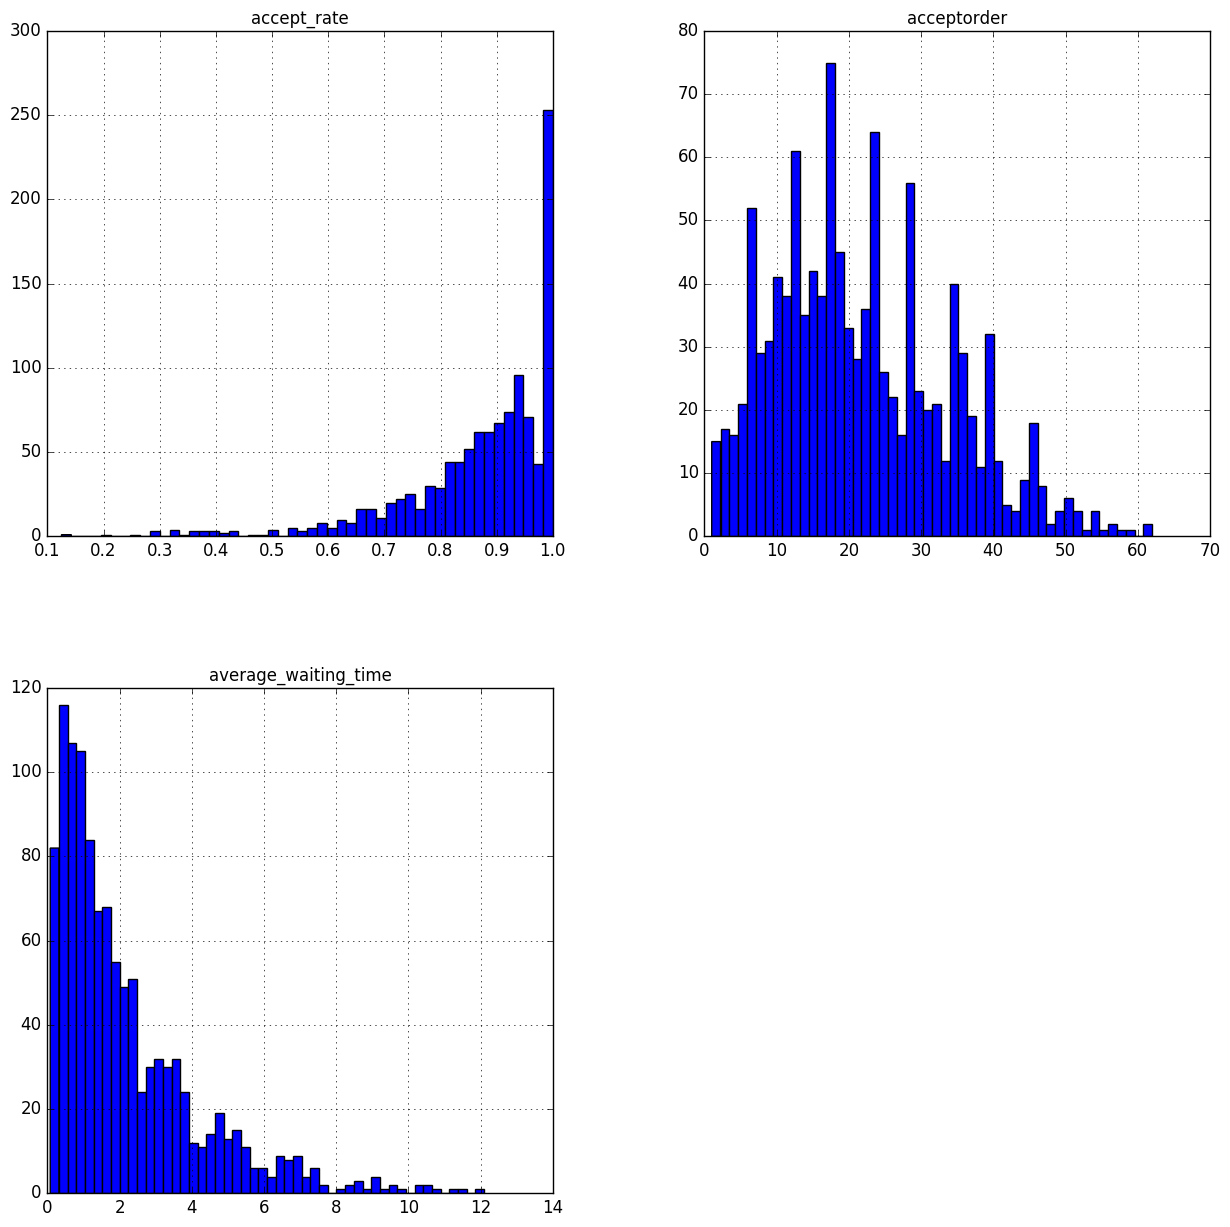

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
Dong_Da2.hist(bins=50, figsize=(15,15))

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(Dong_Da2, test_size=0.3, random_state=seednumber)
Xtrain = train_set['average_waiting_time'].reshape(-1,1)
Ytrain = train_set['accept_rate'].reshape(-1,1)

Xtest = test_set['average_waiting_time'].reshape(-1,1)
Ytest = test_set['accept_rate'].reshape(-1,1)

Ytest1 = test_set.accept_rate
Ytest1.describe(include=all)



count    339.000000
mean       0.856969
std        0.153325
min        0.212121
25%        0.801961
50%        0.896552
75%        0.967204
max        1.000000
Name: accept_rate, dtype: float64

# Linear Regression - ML model

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
result = model.fit(Xtrain, Ytrain)


In [41]:
Accept_rate_prediction = model.predict(Xtest)
print("Predictions:\t", Accept_rate_prediction)

# len(Accept_rate_prediction)

Accept_rate_train1 = model.predict(Xtrain)





Predictions:	 [[ 0.95532443]
 [ 0.93657539]
 [ 0.96100144]
 [ 0.8245266 ]
 [ 0.92267839]
 [ 0.93274919]
 [ 0.90061817]
 [ 0.9086935 ]
 [ 0.86126631]
 [ 0.87256703]
 [ 0.92493033]
 [ 0.88844896]
 [ 0.81986898]
 [ 0.90945146]
 [ 0.72546377]
 [ 0.84472974]
 [ 0.73775215]
 [ 0.90599093]
 [ 0.86785032]
 [ 0.86236561]
 [ 0.86443907]
 [ 0.69805063]
 [ 0.93278746]
 [ 0.75482978]
 [ 0.82425714]
 [ 0.90753082]
 [ 0.80394412]
 [ 0.76425454]
 [ 0.58265037]
 [ 0.63768839]
 [ 0.90850799]
 [ 0.87951486]
 [ 0.80104437]
 [ 0.92876749]
 [ 0.9379506 ]
 [ 0.83929343]
 [ 0.90845435]
 [ 0.60035568]
 [ 0.82431518]
 [ 0.69398981]
 [ 0.8114214 ]
 [ 0.88482526]
 [ 0.88990208]
 [ 0.91446329]
 [ 0.80778121]
 [ 0.91669958]
 [ 0.84595274]
 [ 0.82969819]
 [ 0.84296755]
 [ 0.89628632]
 [ 0.91819162]
 [ 0.87069935]
 [ 0.94510402]
 [ 0.84286311]
 [ 0.94193555]
 [ 0.92819969]
 [ 0.92737684]
 [ 0.88433203]
 [ 0.95174736]
 [ 0.9384401 ]
 [ 0.80463255]
 [ 0.8216243 ]
 [ 0.93615838]
 [ 0.8556755 ]
 [ 0.95162461]
 [ 0.900547

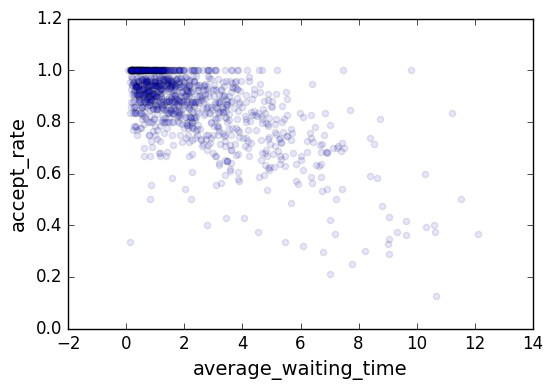

In [36]:
Dong_Da2.plot(kind="scatter", x="average_waiting_time", y="accept_rate", alpha=0.1)


# Mean Squared Error & Mean Absolute Error

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lin_mse = mean_squared_error(Ytest, Accept_rate_prediction)
lin_rmse = np.sqrt(lin_mse) #taking square root of MSE converts the units back to the original units of the output variable

lin_mae = mean_absolute_error(Ytest, Accept_rate_prediction)
print("Mean Square Error:\t",lin_rmse)
print("Mean Absolute Error:\t", lin_mae)


r_squared = r2_score(Ytest, Accept_rate_prediction) #built-in formula for R^2 
print("R^2:\t", r_squared) 

adjusted_Rsquared = 1 - (1-r_squared)*(len(Xtest)-1)/(len(Xtest)-1-1) #formula for adjusted R^2 by theory
print("Adjusted R^2:\t", adjusted_Rsquared) #correct the error when adding more and more independent variables to the linear regression model

lin_mse = mean_squared_error(Ytrain, Accept_rate_train1)
lin_rmse = np.sqrt(lin_mse)
print("Mean Squred Error_train:\t", lin_rmse)


Mean Square Error:	 0.109297647295
Mean Absolute Error:	 0.0802729762216
R^2:	 0.490341024599
Adjusted R^2:	 0.488828683425
Mean Squred Error_train:	 0.0976170768982


# Measure Correlation Coefficients between acceptance rate against other variables

In [77]:
corr_matrix = Dong_Da2.corr()
corr_matrix["accept_rate"].sort_values(ascending=False)

accept_rate             1.000000
acceptorder            -0.084540
average_waiting_time   -0.668629
Name: accept_rate, dtype: float64

# Save the model into disk and load it with given test set (Xtest, Ytest)

In [76]:
from sklearn.externals import joblib
filename = 'my_model.sav'
joblib.dump(model, filename)

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(Xtest, Ytest) #R^2 result
print(result)


0.490341024599
